# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras`.
You should visit [`keras` webpage](https://keras.io/) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [3]:
input_layer = InputLayer(shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [5]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist, boston_housing
from keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [7]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [8]:
x_train, x_test, y_train, y_test = prepare_boston()

In [9]:
print(x_train.shape, y_train.shape)
print(y_train[:10])

(404, 13) (404, 1)
[[0.22666667]
 [0.82888889]
 [1.        ]
 [0.35777778]
 [0.28222222]
 [0.3       ]
 [0.14      ]
 [0.23555556]
 [0.23555556]
 [0.20888889]]


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [10]:
input_layer = InputLayer(shape=(13,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
5/5 - 0s - 95ms/step - loss: 1.4829
Epoch 2/10
5/5 - 0s - 4ms/step - loss: 0.8345
Epoch 3/10
5/5 - 0s - 3ms/step - loss: 0.5017
Epoch 4/10
5/5 - 0s - 4ms/step - loss: 0.3215
Epoch 5/10
5/5 - 0s - 4ms/step - loss: 0.2295
Epoch 6/10
5/5 - 0s - 3ms/step - loss: 0.2025
Epoch 7/10
5/5 - 0s - 4ms/step - loss: 0.1910
Epoch 8/10
5/5 - 0s - 3ms/step - loss: 0.1728
Epoch 9/10
5/5 - 0s - 3ms/step - loss: 0.1621
Epoch 10/10
5/5 - 0s - 4ms/step - loss: 0.1527


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [11]:
x_train, x_test, y_train, y_test = prepare_mnist()

input_layer = InputLayer(shape=x_train.shape[1:])
output_layer = Dense(units=y_train.shape[1], activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 4s - 7ms/step - accuracy: 0.8464 - loss: 0.6249
Epoch 2/10
600/600 - 4s - 6ms/step - accuracy: 0.9057 - loss: 0.3467
Epoch 3/10
600/600 - 4s - 6ms/step - accuracy: 0.9140 - loss: 0.3097
Epoch 4/10
600/600 - 4s - 6ms/step - accuracy: 0.9183 - loss: 0.2927
Epoch 5/10
600/600 - 4s - 6ms/step - accuracy: 0.9214 - loss: 0.2819
Epoch 6/10
600/600 - 4s - 6ms/step - accuracy: 0.9234 - loss: 0.2747
Epoch 7/10
600/600 - 4s - 6ms/step - accuracy: 0.9253 - loss: 0.2693
Epoch 8/10
600/600 - 4s - 6ms/step - accuracy: 0.9256 - loss: 0.2655
Epoch 9/10
600/600 - 4s - 6ms/step - accuracy: 0.9273 - loss: 0.2615
Epoch 10/10
600/600 - 4s - 6ms/step - accuracy: 0.9281 - loss: 0.2593


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [12]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 4s - 7ms/step - accuracy: 0.9073 - loss: 0.3361
Epoch 2/10
600/600 - 4s - 7ms/step - accuracy: 0.9563 - loss: 0.1545
Epoch 3/10
600/600 - 4s - 7ms/step - accuracy: 0.9685 - loss: 0.1105
Epoch 4/10
600/600 - 4s - 7ms/step - accuracy: 0.9757 - loss: 0.0846
Epoch 5/10
600/600 - 4s - 7ms/step - accuracy: 0.9803 - loss: 0.0671
Epoch 6/10
600/600 - 4s - 7ms/step - accuracy: 0.9840 - loss: 0.0553
Epoch 7/10
600/600 - 4s - 7ms/step - accuracy: 0.9871 - loss: 0.0451
Epoch 8/10
600/600 - 4s - 7ms/step - accuracy: 0.9895 - loss: 0.0373
Epoch 9/10
600/600 - 4s - 7ms/step - accuracy: 0.9916 - loss: 0.0311
Epoch 10/10
600/600 - 4s - 7ms/step - accuracy: 0.9927 - loss: 0.0262


In [13]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 8ms/step - accuracy: 0.9150 - loss: 0.2948
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9646 - loss: 0.1192
Epoch 3/10
600/600 - 5s - 8ms/step - accuracy: 0.9754 - loss: 0.0802
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9813 - loss: 0.0613
Epoch 5/10
600/600 - 5s - 8ms/step - accuracy: 0.9844 - loss: 0.0482
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9883 - loss: 0.0370
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9903 - loss: 0.0310
Epoch 8/10
600/600 - 5s - 8ms/step - accuracy: 0.9918 - loss: 0.0261
Epoch 9/10
600/600 - 5s - 8ms/step - accuracy: 0.9932 - loss: 0.0215
Epoch 10/10
600/600 - 5s - 8ms/step - accuracy: 0.9936 - loss: 0.0194


In [14]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 9ms/step - accuracy: 0.9150 - loss: 0.2899
Epoch 2/10
600/600 - 5s - 9ms/step - accuracy: 0.9657 - loss: 0.1128
Epoch 3/10
600/600 - 5s - 9ms/step - accuracy: 0.9758 - loss: 0.0785
Epoch 4/10
600/600 - 5s - 9ms/step - accuracy: 0.9816 - loss: 0.0584
Epoch 5/10
600/600 - 5s - 9ms/step - accuracy: 0.9849 - loss: 0.0470
Epoch 6/10
600/600 - 5s - 9ms/step - accuracy: 0.9875 - loss: 0.0384
Epoch 7/10
600/600 - 6s - 9ms/step - accuracy: 0.9897 - loss: 0.0309
Epoch 8/10
600/600 - 5s - 9ms/step - accuracy: 0.9908 - loss: 0.0279
Epoch 9/10
600/600 - 5s - 9ms/step - accuracy: 0.9925 - loss: 0.0210
Epoch 10/10
600/600 - 5s - 9ms/step - accuracy: 0.9930 - loss: 0.0209


In [15]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,384 (1.54 MB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,590 (1.03 MB)

**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [16]:
units = 134794 / 794

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

134365
Epoch 1/10
600/600 - 5s - 8ms/step - accuracy: 0.9132 - loss: 0.3166
Epoch 2/10
600/600 - 4s - 7ms/step - accuracy: 0.9604 - loss: 0.1380
Epoch 3/10
600/600 - 4s - 7ms/step - accuracy: 0.9726 - loss: 0.0960
Epoch 4/10
600/600 - 4s - 7ms/step - accuracy: 0.9793 - loss: 0.0720
Epoch 5/10
600/600 - 4s - 7ms/step - accuracy: 0.9833 - loss: 0.0563
Epoch 6/10
600/600 - 4s - 7ms/step - accuracy: 0.9872 - loss: 0.0440
Epoch 7/10
600/600 - 4s - 7ms/step - accuracy: 0.9898 - loss: 0.0355
Epoch 8/10
600/600 - 4s - 7ms/step - accuracy: 0.9922 - loss: 0.0288
Epoch 9/10
600/600 - 4s - 7ms/step - accuracy: 0.9938 - loss: 0.0232
Epoch 10/10
600/600 - 4s - 7ms/step - accuracy: 0.9952 - loss: 0.0190


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://keras.io/api/models/model_training_apis/#fit-method) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [17]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

Epoch 1/10
420/420 - 4s - 11ms/step - accuracy: 0.9029 - loss: 0.3397 - val_accuracy: 0.9486 - val_loss: 0.1737
Epoch 2/10
420/420 - 4s - 11ms/step - accuracy: 0.9602 - loss: 0.1319 - val_accuracy: 0.9629 - val_loss: 0.1229
Epoch 3/10
420/420 - 5s - 11ms/step - accuracy: 0.9725 - loss: 0.0900 - val_accuracy: 0.9651 - val_loss: 0.1146
Epoch 4/10
420/420 - 4s - 11ms/step - accuracy: 0.9790 - loss: 0.0656 - val_accuracy: 0.9685 - val_loss: 0.1040
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9842 - loss: 0.0480 - val_accuracy: 0.9696 - val_loss: 0.1043
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9870 - loss: 0.0401 - val_accuracy: 0.9719 - val_loss: 0.1030
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9902 - loss: 0.0310 - val_accuracy: 0.9703 - val_loss: 0.1097
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9729 - val_loss: 0.1027
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9923 - loss: 0.0237 - val_accuracy: 0.9696 - val_loss:

In [18]:
units = 134794 / 794

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

134365
Epoch 1/10
420/420 - 4s - 8ms/step - accuracy: 0.9005 - loss: 0.3590 - val_accuracy: 0.9413 - val_loss: 0.2073
Epoch 2/10
420/420 - 4s - 9ms/step - accuracy: 0.9522 - loss: 0.1673 - val_accuracy: 0.9562 - val_loss: 0.1539
Epoch 3/10
420/420 - 4s - 8ms/step - accuracy: 0.9661 - loss: 0.1182 - val_accuracy: 0.9613 - val_loss: 0.1335
Epoch 4/10
420/420 - 4s - 8ms/step - accuracy: 0.9745 - loss: 0.0903 - val_accuracy: 0.9669 - val_loss: 0.1148
Epoch 5/10
420/420 - 4s - 8ms/step - accuracy: 0.9801 - loss: 0.0696 - val_accuracy: 0.9694 - val_loss: 0.1055
Epoch 6/10
420/420 - 4s - 9ms/step - accuracy: 0.9840 - loss: 0.0563 - val_accuracy: 0.9694 - val_loss: 0.1015
Epoch 7/10
420/420 - 4s - 8ms/step - accuracy: 0.9871 - loss: 0.0468 - val_accuracy: 0.9696 - val_loss: 0.1047
Epoch 8/10
420/420 - 4s - 8ms/step - accuracy: 0.9892 - loss: 0.0383 - val_accuracy: 0.9732 - val_loss: 0.0944
Epoch 9/10
420/420 - 4s - 8ms/step - accuracy: 0.9923 - loss: 0.0304 - val_accuracy: 0.9729 - val_loss: 0

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [19]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.8990 - loss: 0.3531 - val_accuracy: 0.9438 - val_loss: 0.1893
Epoch 2/10
420/420 - 4s - 9ms/step - accuracy: 0.9567 - loss: 0.1430 - val_accuracy: 0.9612 - val_loss: 0.1320
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9706 - loss: 0.0982 - val_accuracy: 0.9631 - val_loss: 0.1244
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9779 - loss: 0.0731 - val_accuracy: 0.9657 - val_loss: 0.1128
Epoch 5/10
420/420 - 4s - 9ms/step - accuracy: 0.9822 - loss: 0.0564 - val_accuracy: 0.9698 - val_loss: 0.1006
Epoch 6/10
420/420 - 4s - 9ms/step - accuracy: 0.9864 - loss: 0.0435 - val_accuracy: 0.9704 - val_loss: 0.1063
Epoch 7/10
420/420 - 4s - 9ms/step - accuracy: 0.9887 - loss: 0.0357 - val_accuracy: 0.9684 - val_loss: 0.1086
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9911 - loss: 0.0281 - val_accuracy: 0.9718 - val_loss: 0.1047
Epoch 9/10
420/420 - 4s - 9ms/step - accuracy: 0.9932 - loss: 0.0229 - val_accuracy: 0.9717 - val_loss: 0.11

In [20]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 3s - 8ms/step - accuracy: 0.6922 - loss: 1.2735 - val_accuracy: 0.8524 - val_loss: 0.6321
Epoch 2/10
420/420 - 3s - 8ms/step - accuracy: 0.8695 - loss: 0.5178 - val_accuracy: 0.8853 - val_loss: 0.4256
Epoch 3/10
420/420 - 3s - 7ms/step - accuracy: 0.8912 - loss: 0.4004 - val_accuracy: 0.8986 - val_loss: 0.3634
Epoch 4/10
420/420 - 3s - 7ms/step - accuracy: 0.9023 - loss: 0.3526 - val_accuracy: 0.9052 - val_loss: 0.3321
Epoch 5/10
420/420 - 3s - 7ms/step - accuracy: 0.9093 - loss: 0.3239 - val_accuracy: 0.9132 - val_loss: 0.3086
Epoch 6/10
420/420 - 3s - 7ms/step - accuracy: 0.9150 - loss: 0.3025 - val_accuracy: 0.9161 - val_loss: 0.2933
Epoch 7/10
420/420 - 3s - 7ms/step - accuracy: 0.9193 - loss: 0.2859 - val_accuracy: 0.9199 - val_loss: 0.2798
Epoch 8/10
420/420 - 3s - 7ms/step - accuracy: 0.9236 - loss: 0.2714 - val_accuracy: 0.9240 - val_loss: 0.2678
Epoch 9/10
420/420 - 3s - 7ms/step - accuracy: 0.9270 - loss: 0.2591 - val_accuracy: 0.9244 - val_loss: 0.2590
E

In [21]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 9ms/step - accuracy: 0.9020 - loss: 0.3482 - val_accuracy: 0.9430 - val_loss: 0.1919
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9563 - loss: 0.1448 - val_accuracy: 0.9546 - val_loss: 0.1512
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9709 - loss: 0.0944 - val_accuracy: 0.9632 - val_loss: 0.1251
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9788 - loss: 0.0704 - val_accuracy: 0.9681 - val_loss: 0.1103
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9836 - loss: 0.0521 - val_accuracy: 0.9699 - val_loss: 0.1072
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9695 - val_loss: 0.1085
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9907 - loss: 0.0312 - val_accuracy: 0.9712 - val_loss: 0.1069
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9925 - loss: 0.0250 - val_accuracy: 0.9691 - val_loss: 0.1185
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9930 - loss: 0.0222 - val_accuracy: 0.9733 - val_loss: 

**Question #8.** Using [the docs](https://keras.io/api/optimizers/), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [22]:
from keras.optimizers import Adam

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.7521 - loss: 1.0018 - val_accuracy: 0.8915 - val_loss: 0.4144
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9048 - loss: 0.3516 - val_accuracy: 0.9149 - val_loss: 0.3001
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9229 - loss: 0.2776 - val_accuracy: 0.9246 - val_loss: 0.2627
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9330 - loss: 0.2388 - val_accuracy: 0.9340 - val_loss: 0.2319
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9402 - loss: 0.2119 - val_accuracy: 0.9392 - val_loss: 0.2127
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9460 - loss: 0.1911 - val_accuracy: 0.9429 - val_loss: 0.1999
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9510 - loss: 0.1740 - val_accuracy: 0.9489 - val_loss: 0.1832
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9538 - loss: 0.1600 - val_accuracy: 0.9497 - val_loss: 0.1758
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9576 - loss: 0.1482 - val_accuracy: 0.9524 - val_loss:

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [23]:
model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.9037 - loss: 0.3418 - val_accuracy: 0.9488 - val_loss: 0.1803
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9593 - loss: 0.1392 - val_accuracy: 0.9558 - val_loss: 0.1439
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9702 - loss: 0.0989 - val_accuracy: 0.9643 - val_loss: 0.1231
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9779 - loss: 0.0708 - val_accuracy: 0.9644 - val_loss: 0.1166
Epoch 5/10
420/420 - 4s - 11ms/step - accuracy: 0.9831 - loss: 0.0537 - val_accuracy: 0.9675 - val_loss: 0.1066
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9867 - loss: 0.0428 - val_accuracy: 0.9702 - val_loss: 0.1025
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9586 - val_loss: 0.1480
Epoch 8/10
420/420 - 4s - 9ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9706 - val_loss: 0.1088
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9658 - val_loss: 

In [24]:
h.history

{'accuracy': [0.9037142992019653,
  0.9593333601951599,
  0.970214307308197,
  0.9778809547424316,
  0.9831190705299377,
  0.9866904616355896,
  0.989047646522522,
  0.9912142753601074,
  0.9939523935317993,
  0.9941428303718567],
 'loss': [0.341793030500412,
  0.13921228051185608,
  0.09891991317272186,
  0.07082367688417435,
  0.05365399643778801,
  0.042842742055654526,
  0.03471831977367401,
  0.027784254401922226,
  0.019933296367526054,
  0.01868293620646],
 'val_accuracy': [0.9487777948379517,
  0.9558333158493042,
  0.9643333554267883,
  0.964388906955719,
  0.9674999713897705,
  0.9701666831970215,
  0.9585555791854858,
  0.9706110954284668,
  0.965833306312561,
  0.9713333249092102],
 'val_loss': [0.18031391501426697,
  0.14390170574188232,
  0.12306156754493713,
  0.11659863591194153,
  0.10656054317951202,
  0.1025291457772255,
  0.14801089465618134,
  0.1088290810585022,
  0.12961217761039734,
  0.11366774886846542]}

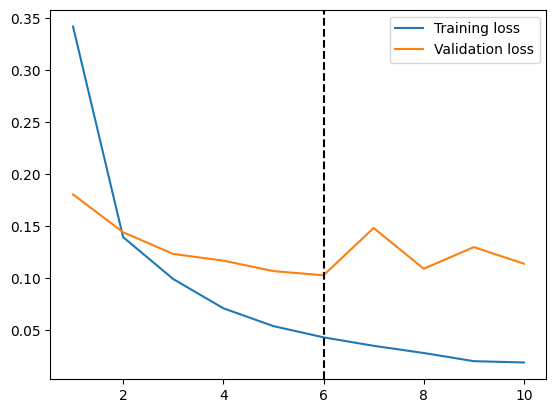

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), h.history["loss"], label="Training loss")
plt.plot(np.arange(1, 11), h.history["val_loss"], label="Validation loss")
plt.axvline(x=np.argmin(h.history["val_loss"]) + 1, color='k', linestyle='--')
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.keras` on your project. Only record models if validation loss is lower than for all previous models.

In [26]:
from keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint("model.keras", save_best_only=True)

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10
600/600 - 8s - 13ms/step - accuracy: 0.9170 - loss: 0.2934 - val_accuracy: 0.9612 - val_loss: 0.1359
Epoch 2/10
600/600 - 5s - 9ms/step - accuracy: 0.9639 - loss: 0.1194 - val_accuracy: 0.9694 - val_loss: 0.1027
Epoch 3/10
600/600 - 5s - 9ms/step - accuracy: 0.9749 - loss: 0.0810 - val_accuracy: 0.9714 - val_loss: 0.0902
Epoch 4/10
600/600 - 5s - 9ms/step - accuracy: 0.9814 - loss: 0.0598 - val_accuracy: 0.9733 - val_loss: 0.0820
Epoch 5/10
600/600 - 5s - 9ms/step - accuracy: 0.9841 - loss: 0.0485 - val_accuracy: 0.9761 - val_loss: 0.0775
Epoch 6/10
600/600 - 5s - 9ms/step - accuracy: 0.9883 - loss: 0.0376 - val_accuracy: 0.9780 - val_loss: 0.0711
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9788 - val_loss: 0.0711
Epoch 8/10
600/600 - 5s - 9ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9771 - val_loss: 0.0799
Epoch 9/10
600/600 - 5s - 9ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9757 - val_loss: 0.0880


Use the code below to check that a model has been saved:

In [27]:
%ls -alh "model.keras"

-rw-r--r--@ 1 rtavenar  staff   1.4M Oct 24 17:45 model.keras


In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9748 - loss: 0.0935


[0.0794522762298584, 0.978600025177002]

In [30]:
new_model = keras.models.load_model("model.keras")
new_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9740 - loss: 0.0824


[0.07106669992208481, 0.9779999852180481]

## Regularization

**Question #11.** Add an $\ell_2$ regularization to the weights of your model and show its impact on overfitting. [These docs](https://keras.io/api/layers/regularizers/) could help.

In [31]:
from keras.regularizers import l2

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=y_train.shape[1], activation="softmax", kernel_regularizer=l2(.001))
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 5s - 11ms/step - accuracy: 0.9001 - loss: 0.5892 - val_accuracy: 0.9511 - val_loss: 0.3750
Epoch 2/10
480/480 - 5s - 10ms/step - accuracy: 0.9543 - loss: 0.3419 - val_accuracy: 0.9604 - val_loss: 0.3139
Epoch 3/10
480/480 - 5s - 10ms/step - accuracy: 0.9640 - loss: 0.2867 - val_accuracy: 0.9632 - val_loss: 0.2764
Epoch 4/10
480/480 - 5s - 10ms/step - accuracy: 0.9689 - loss: 0.2582 - val_accuracy: 0.9679 - val_loss: 0.2563
Epoch 5/10
480/480 - 5s - 10ms/step - accuracy: 0.9705 - loss: 0.2432 - val_accuracy: 0.9697 - val_loss: 0.2439
Epoch 6/10
480/480 - 5s - 10ms/step - accuracy: 0.9724 - loss: 0.2338 - val_accuracy: 0.9687 - val_loss: 0.2418
Epoch 7/10
480/480 - 5s - 10ms/step - accuracy: 0.9736 - loss: 0.2268 - val_accuracy: 0.9726 - val_loss: 0.2301
Epoch 8/10
480/480 - 5s - 10ms/step - accuracy: 0.9744 - loss: 0.2233 - val_accuracy: 0.9683 - val_loss: 0.2410
Epoch 9/10
480/480 - 5s - 10ms/step - accuracy: 0.9761 - loss: 0.2199 - val_accuracy: 0.9697 - val_loss:

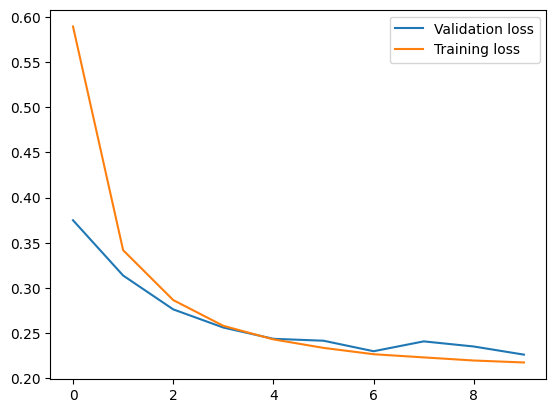

In [32]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #12.** Instead of the $\ell_2$ regularization, set up a [drop-out](https://keras.io/api/layers/regularization_layers/dropout/) strategy and assess its impact on overfitting (you will turn off 10% of the neurons at each training batch).

In [33]:
from keras.layers import Dropout

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 5s - 9ms/step - accuracy: 0.8813 - loss: 0.3937 - val_accuracy: 0.9538 - val_loss: 0.1576
Epoch 2/10
480/480 - 4s - 9ms/step - accuracy: 0.9469 - loss: 0.1740 - val_accuracy: 0.9649 - val_loss: 0.1138
Epoch 3/10
480/480 - 4s - 9ms/step - accuracy: 0.9600 - loss: 0.1278 - val_accuracy: 0.9694 - val_loss: 0.0991
Epoch 4/10
480/480 - 5s - 9ms/step - accuracy: 0.9678 - loss: 0.1053 - val_accuracy: 0.9737 - val_loss: 0.0873
Epoch 5/10
480/480 - 4s - 9ms/step - accuracy: 0.9720 - loss: 0.0900 - val_accuracy: 0.9750 - val_loss: 0.0794
Epoch 6/10
480/480 - 4s - 9ms/step - accuracy: 0.9752 - loss: 0.0780 - val_accuracy: 0.9758 - val_loss: 0.0792
Epoch 7/10
480/480 - 5s - 10ms/step - accuracy: 0.9771 - loss: 0.0704 - val_accuracy: 0.9768 - val_loss: 0.0770
Epoch 8/10
480/480 - 5s - 10ms/step - accuracy: 0.9792 - loss: 0.0635 - val_accuracy: 0.9772 - val_loss: 0.0766
Epoch 9/10
480/480 - 5s - 10ms/step - accuracy: 0.9815 - loss: 0.0583 - val_accuracy: 0.9779 - val_loss: 0.076

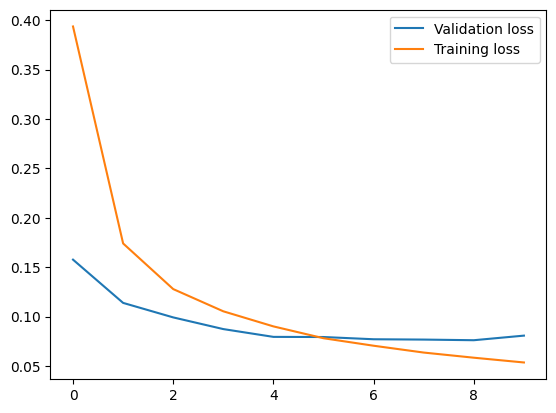

In [35]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #13.** Set up an [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [36]:
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model = Sequential([
    InputLayer(shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100
600/600 - 5s - 9ms/step - accuracy: 0.9162 - loss: 0.2933 - val_accuracy: 0.9607 - val_loss: 0.1331
Epoch 2/100
600/600 - 5s - 9ms/step - accuracy: 0.9645 - loss: 0.1188 - val_accuracy: 0.9692 - val_loss: 0.0998
Epoch 3/100
600/600 - 5s - 9ms/step - accuracy: 0.9747 - loss: 0.0821 - val_accuracy: 0.9743 - val_loss: 0.0877
Epoch 4/100
600/600 - 5s - 9ms/step - accuracy: 0.9803 - loss: 0.0610 - val_accuracy: 0.9742 - val_loss: 0.0923
Epoch 5/100
600/600 - 5s - 9ms/step - accuracy: 0.9844 - loss: 0.0502 - val_accuracy: 0.9772 - val_loss: 0.0725
Epoch 6/100
600/600 - 5s - 9ms/step - accuracy: 0.9881 - loss: 0.0385 - val_accuracy: 0.9781 - val_loss: 0.0773
Epoch 7/100
600/600 - 5s - 9ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9758 - val_loss: 0.0837
Epoch 8/100
600/600 - 5s - 9ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9775 - val_loss: 0.0817


In [37]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9742 - loss: 0.0871


[0.072513148188591, 0.9771999716758728]